In [1]:
import numpy as np
import pandas as pd
import googlemaps

In [88]:
crime_anal_police = pd.read_csv('../data/02. crime_in_Seoul_include_gu_name.csv', thousands=',', index_col=0)

In [29]:
crime_anal_police.head()

,구별,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
0,강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,0.894540,85.463066
1,강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,0.223310,85.550226
2,강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,0.298949,94.070728
3,관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,0.522733,85.212224
4,광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,0.406888,96.375820


In [85]:
gmaps_key = ''#############
gmaps = googlemaps.Client(key=gmaps_key)
#gmaps.geocode('서울중부경찰서', language='ko')

In [86]:
tmp = gmaps.geocode('서울중부경찰서', language='ko')
print (tmp[0].get('formatted_address'))
#print (tmp[0].get('geometry'))
tmp_loc = tmp[0].get('geometry')
print ('위도 : ', tmp_loc['location']['lat'])
print ('경도 : ', tmp_loc['location']['lng'])

대한민국 서울특별시 중구 수표로 27
위도 :  37.56361709999999
경도 :  126.9896517


In [89]:
station_name = []

for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')

In [90]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get('formatted_address'))
    station_lat.append(tmp[0].get('geometry')['location']['lat'])
    station_lng.append(tmp[0].get('geometry')['location']['lng'])
# print (station_address)
# print (station_lat)
# print(station_lng)

In [55]:
gu_name = []
for name in station_address:
    tmp = name.split()
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    gu_name.append(tmp_gu)

crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [56]:
crime_anal_police.to_csv('../output/02_crime_in_Seoul_include_gu_name.csv', sep=',', encoding='utf-8')

In [3]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 12 columns):
관서명      31 non-null object
살인 발생    31 non-null int64
살인 검거    31 non-null int64
강도 발생    31 non-null int64
강도 검거    31 non-null int64
강간 발생    31 non-null int64
강간 검거    31 non-null int64
절도 발생    31 non-null int64
절도 검거    31 non-null int64
폭력 발생    31 non-null int64
폭력 검거    31 non-null int64
구별       31 non-null object
dtypes: int64(10), object(2)
memory usage: 3.1+ KB


In [2]:
crime_anal_raw = pd.read_csv('../output/02_crime_in_Seoul_include_gu_name.csv', encoding='utf-8', index_col=0)
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=sum)
# crime_anal_raw.head()
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [3]:
lists = ['강간', '강도', '살인', '절도', '폭력']
for st in lists:
    crime_anal[st+'검거율'] = crime_anal[st+' 검거']/crime_anal[st+' 발생']*100
    del crime_anal[st + ' 검거']

In [5]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
crime_anal.head()
for st in lists:
    crime_anal.rename(columns = {st+' 발생':st}, inplace=True)

In [8]:
from sklearn import preprocessing
col = ['강간', '강도', '살인', '절도', '폭력']
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))

crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index=crime_anal.index)
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [9]:
crime_anal_norm.to_csv('../output/02_0721_normalized.csv', encoding='utf-8')

In [13]:
result_CCTV = pd.read_csv('../data/01. CCTV_result.csv', encoding='utf-8', index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm['검거'] = np.sum(crime_anal_norm[con_list], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path='C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


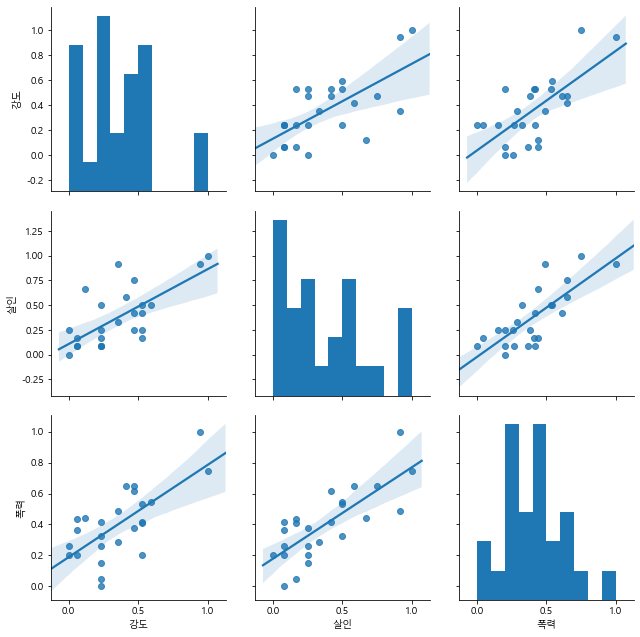

In [17]:
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', size=3)
plt.show()

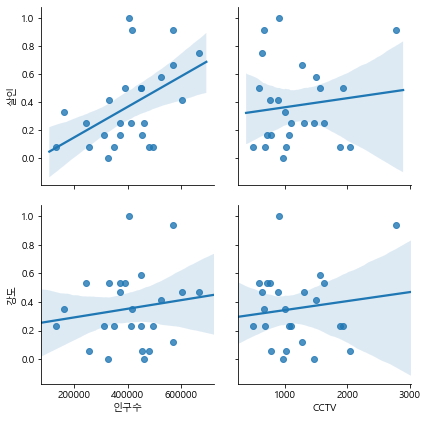

In [21]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인', '강도'], kind='reg', size=3)
plt.show()

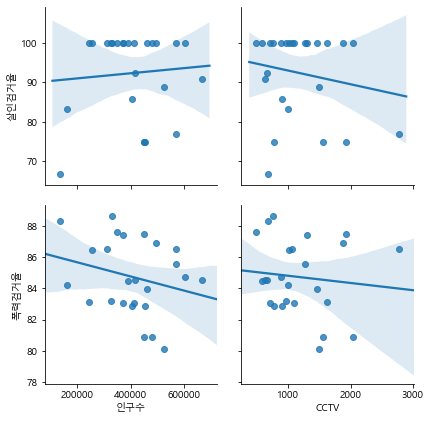

In [25]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인검거율', '폭력검거율'], kind='reg', size=3)
plt.show()

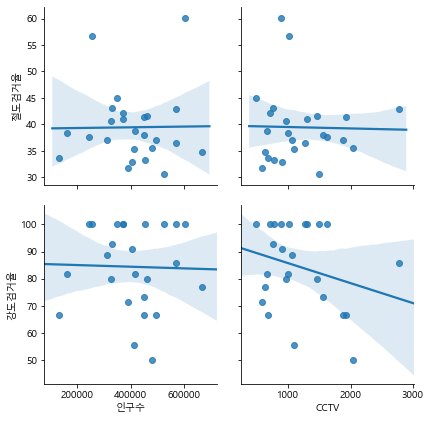

In [24]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['절도검거율', '강도검거율'], kind='reg', size=3)
plt.show()

In [28]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거']  = crime_anal_norm['검거']/tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


matplotlib version : 3.1.1


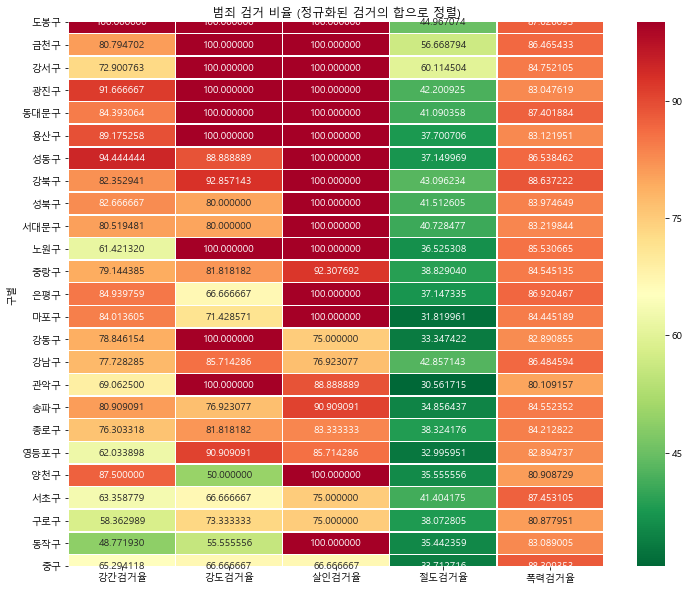

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(crime_anal_norm_sort[con_list], annot=True, fmt='f', linewidth=.5, cmap='RdYlGn_r')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
import matplotlib
print('matplotlib version : {}'.format(matplotlib.__version__))
plt.show()

matplotlib version : 3.1.1


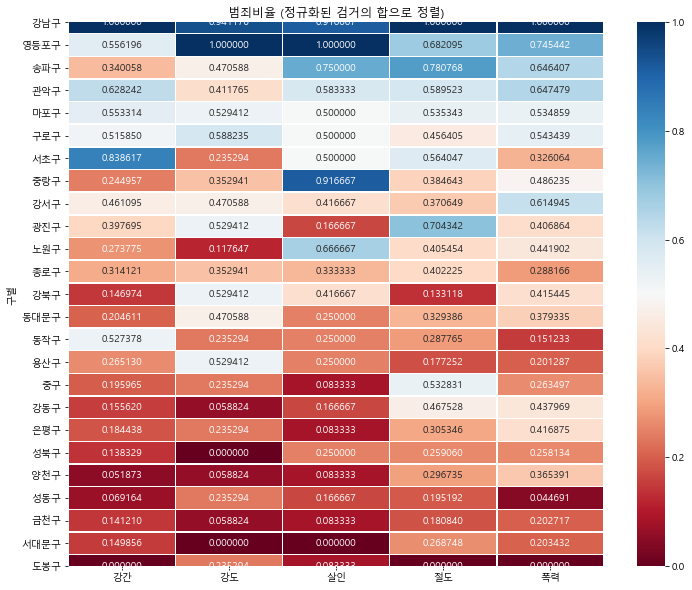

In [45]:
crime_anal_norm['범죄'] /= 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
crime_anal_norm_sort.head()
plt.figure(figsize=(12,10))
sns.heatmap(crime_anal_norm_sort[col], annot=True, fmt='f', linewidth=.5, cmap='RdBu')
plt.title('범죄비율 (정규화된 검거의 합으로 정렬)')
import matplotlib
print('matplotlib version : {}'.format(matplotlib.__version__))
plt.show()

In [46]:
crime_anal_norm.to_csv('../output/02. crime_in_Seoul_final.csv', sep=',', encoding='utf-8')

In [72]:
import folium
import json
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)#, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, \
               data = crime_anal_norm['살인'], \
               columns = [crime_anal_norm.index, crime_anal_norm['살인']], \
               fill_color='PuRd', \
               key_on='feature.id') # geo_data 안의 feature.id 사용
#print (geo_str)
map

In [74]:
import folium
import json
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, \
               data = crime_anal_norm['강간'], \
               columns = [crime_anal_norm.index, crime_anal_norm['강간']], \
               fill_color='PuRd', \
               key_on='feature.id') # geo_data 안의 feature.id 사용
#print (geo_str)
map

In [75]:
import folium
import json
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, \
               data = crime_anal_norm['범죄'], \
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']], \
               fill_color='PuRd', \
               key_on='feature.id') # geo_data 안의 feature.id 사용
#print (geo_str)
map

In [78]:
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 1000000
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)#, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, \
               data = tmp_criminal, \
               columns = [crime_anal_norm.index, tmp_criminal], \
               fill_color='PuRd', \
               key_on='feature.id') # geo_data 안의 feature.id 사용
#print (geo_str)
map

In [82]:
tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 1000000000
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)#, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, \
               data = tmp_criminal, \
               columns = [crime_anal_norm.index, tmp_criminal], \
               fill_color='PuRd', \
               key_on='feature.id') # geo_data 안의 feature.id 사용
#print (geo_str)
map

In [83]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)#, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, \
               data = crime_anal_norm['검거'], \
               columns = [crime_anal_norm.index, crime_anal_norm['검거']], \
               fill_color='PuRd', \
               key_on='feature.id') # geo_data 안의 feature.id 사용
#print (geo_str)
map

In [93]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
crime_anal_raw['검거'] = np.sum(tmp, axis=1)
crime_anal_raw.head()

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]]).add_to(map)
map

In [95]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
crime_anal_raw['검거'] = np.sum(tmp, axis=1)
crime_anal_raw.head()

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],\
                        radius=crime_anal_raw['검거'][n]*10, color='#3186cc', \
                        fill_color='#3186cc',fill=True).add_to(map)
map

In [96]:
map.save('../output/seoul_map.html')

In [98]:
crime_anal_raw.to_csv('../output/02. crime_location.csv', encoding='utf-8')